In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("caliFiles/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 243/243 [00:08<00:00, 29.83it/s]


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

18.255 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
11.197 main
├─ nan MPI_Barrier
├─ 8.481 comm
│  ├─ 8.481 comm_large
│  │  └─ 8.481 MPI_Gather
│  └─ 0.000 comm_small
├─ 2.628 comp
│  ├─ 2.211 comp_large
│  │  ├─ 0.867 MPI_Allreduce
│  │  └─ nan MPI_Barrier
│  └─ 0.417 comp_small
│     └─ 0.417 MPI_Gather
├─ 17.942 correctness_check
└─ 0.052 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 18.26 indices: {'profile': 11808381})
█ 16.43 - 18.26
█ 12.78 - 16.43
█ 9.13 - 12.78
█ 5.48 - 9.13
█ 1.83 - 5.48
█ 0.00 - 1.83

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
tk.metadata.head(10)

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11808381,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp512-a4194304-in3.cali,true,true,true,true,1729810098,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 4194304, 3]",c,radix,mpi,int,4,4194304,3,512,strong,19,ai
39889464,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp32-a4194304-in0.cali,true,true,true,true,1729651096,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 4194304, 0]",c,radix,mpi,int,4,4194304,0,32,strong,19,ai
42946524,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp16-a1048576-in1.cali,true,true,true,true,1729615916,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 1048576, 1]",c,radix,mpi,int,4,1048576,1,16,strong,19,ai
47513577,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp256-a65536-in2.cali,true,true,true,true,1729801044,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 65536, 2]",c,radix,mpi,int,4,65536,2,256,strong,19,ai
49524274,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp16-a1048576-in3.cali,true,true,true,true,1729615920,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 1048576, 3]",c,radix,mpi,int,4,1048576,3,16,strong,19,ai
51554590,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp64-a1048576-in3.cali,true,true,true,true,1729696291,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 1048576, 3]",c,radix,mpi,int,4,1048576,3,64,strong,19,ai
64560944,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp512-a65536-in2.cali,true,true,true,true,1729800915,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 65536, 2]",c,radix,mpi,int,4,65536,2,512,strong,19,ai
81184666,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp512-a65536-in0.cali,true,true,true,true,1729800905,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 65536, 0]",c,radix,mpi,int,4,65536,0,512,strong,19,ai
83030538,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./caliFiles/radixp4-a4194304-in2.cali,true,true,true,true,1729615867,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mpi_mm, 4194304, 2]",c,radix,mpi,int,4,4194304,2,4,strong,19,ai


Group Performance data by `matrix_size` in the Thicket metadata table.

In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")


tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),name,num_procs,input_type,input_size
0,"{'name': 'MPI_Comm_dup', 'type': 'function'}",11808381,20.0,regionprofile,0.000392,18.707042,18.255352,9346.740343,0.696457,1.0,1.0,1.0,512.0,0.000392,18.707042,18.255352,9346.740343,MPI_Comm_dup,512,3,4194304
1,"{'name': 'MPI_Comm_dup', 'type': 'function'}",39889464,20.0,regionprofile,0.000656,0.535247,0.500814,16.026035,0.008162,1.0,1.0,1.0,32.0,0.000656,0.535247,0.500814,16.026035,MPI_Comm_dup,32,0,4194304
2,"{'name': 'MPI_Comm_dup', 'type': 'function'}",42946524,20.0,regionprofile,0.000589,0.069331,0.062837,1.005395,0.000259,1.0,1.0,1.0,16.0,0.000589,0.069331,0.062837,1.005395,MPI_Comm_dup,16,1,1048576
3,"{'name': 'MPI_Comm_dup', 'type': 'function'}",47513577,20.0,regionprofile,0.005746,0.068584,0.062925,16.108703,0.000018,1.0,1.0,1.0,256.0,0.005746,0.068584,0.062925,16.108703,MPI_Comm_dup,256,2,65536
4,"{'name': 'MPI_Comm_dup', 'type': 'function'}",49524274,20.0,regionprofile,0.000565,0.068627,0.062116,0.993853,0.000253,1.0,1.0,1.0,16.0,0.000565,0.068627,0.062116,0.993853,MPI_Comm_dup,16,3,1048576


In [6]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

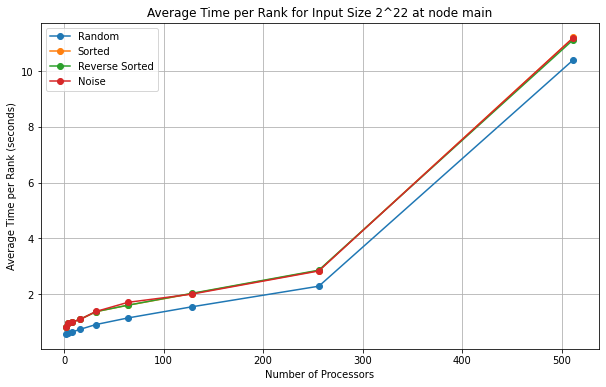

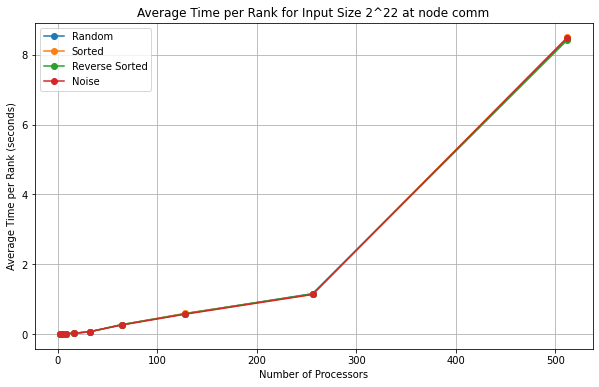

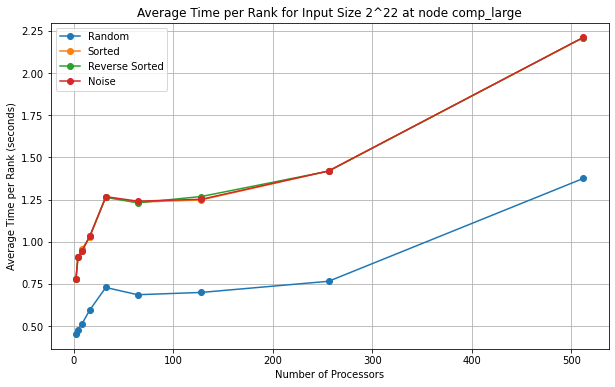

In [47]:
# input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
#                 2^16    2^18    2^20     2^22      2^24     2^26        2^28
input_sizes = [4194304]

# Function to plot average time for strong scaling
def plot_strong_scaling_average_time(tk, input_sizes):
    input_type_labels = {0: "Random", 1: "Sorted", 2: "Reverse Sorted", 3: "Noise"}  # Mapping numeric types to labels
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name in ['comp_large', 'comm', 'main']:  # Focus only on these nodes for simplicity
            for input_size in input_sizes:
                fig, ax = plt.subplots(figsize=(10, 6))
                for input_type in [0, 1, 2, 3]:  # Use numeric input types
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["input_size"] == input_size) &
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    ax.plot(data["num_procs"], data["Avg time/rank"], marker='o', label=input_type_labels[input_type])

                ax.set_title(f'Average Time per Rank for Input Size 2^22 at node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Average Time per Rank (seconds)')
                ax.legend()
                plt.grid(True)
                plt.show()

# Assuming your input sizes array and the Thicket object (tk) are already defined
plot_strong_scaling_average_time(tk, input_sizes)

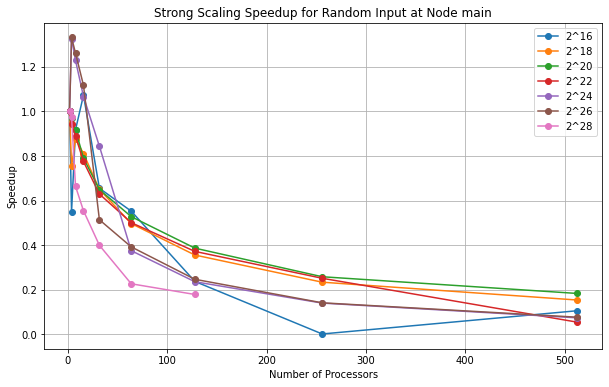

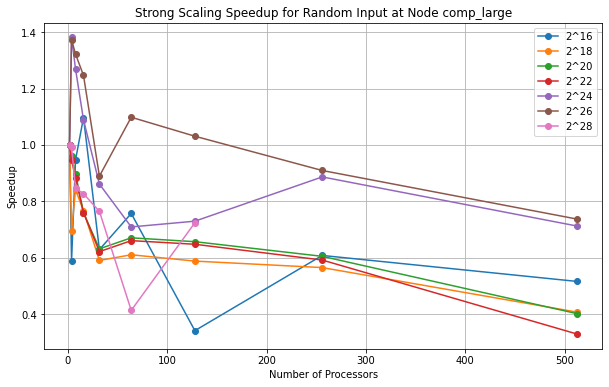

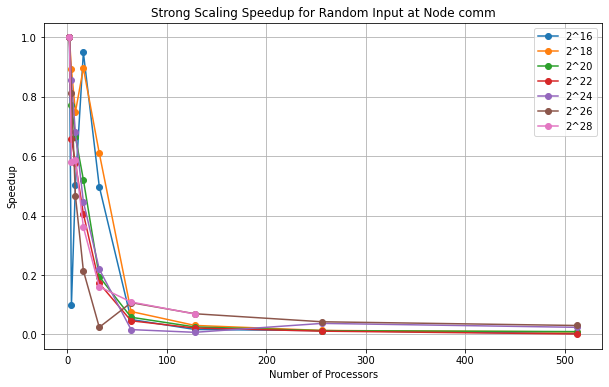

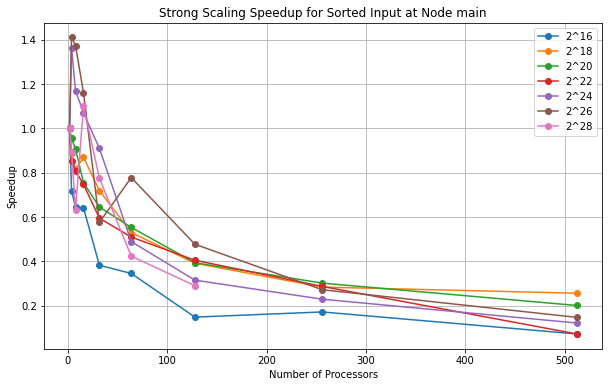

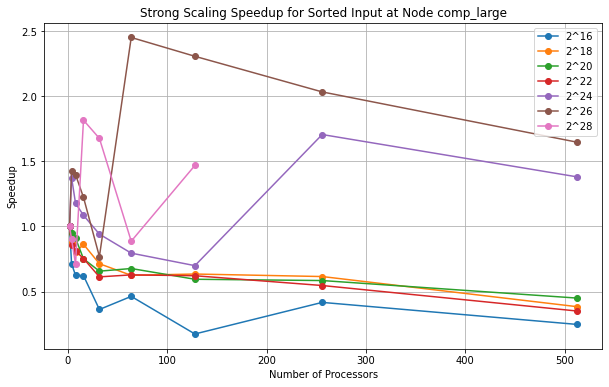

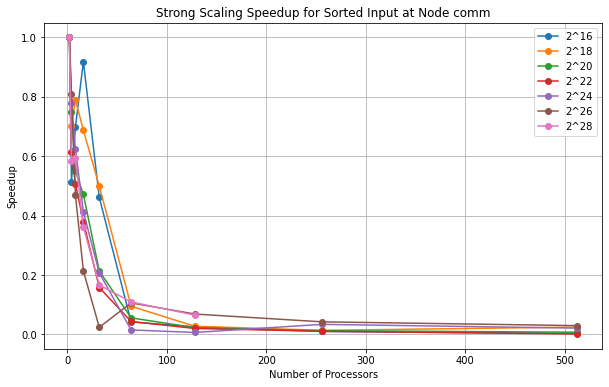

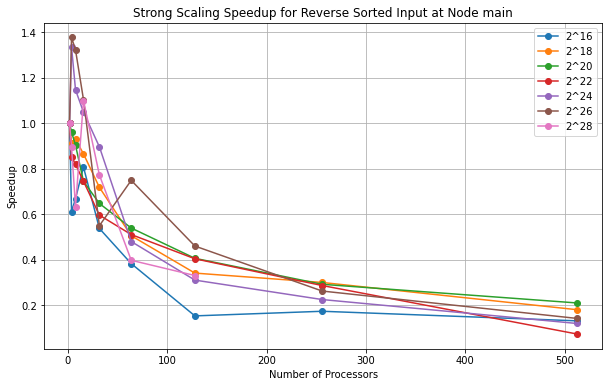

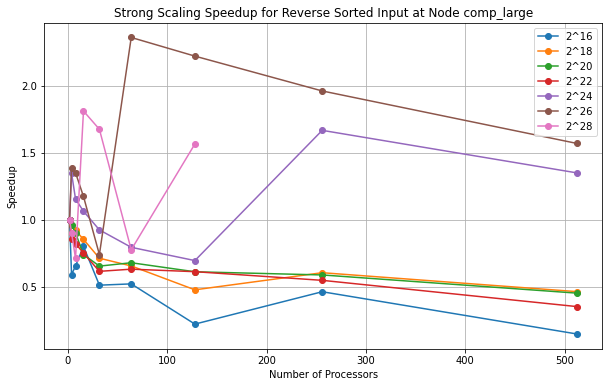

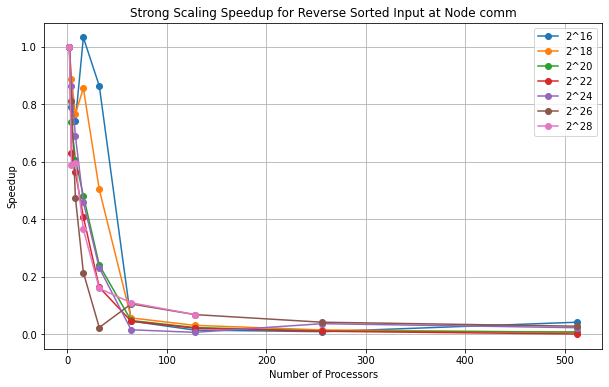

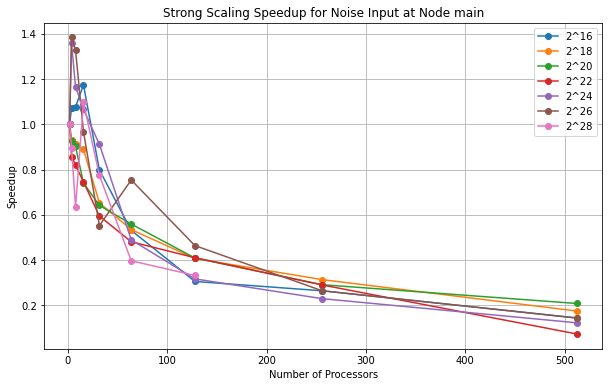

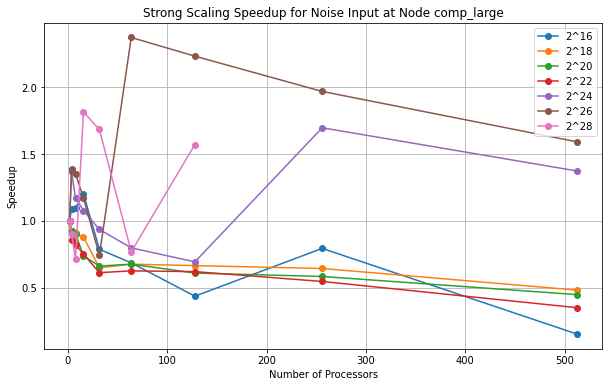

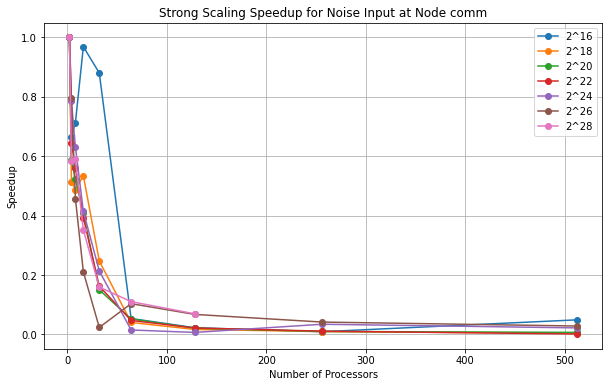

In [7]:
input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

# Function to plot strong scaling speedup for each input type
def plot_strong_scaling_speedup(tk, input_sizes):
    input_type_labels = {0: "Random", 1: "Sorted", 2: "Reverse Sorted", 3: "Noise"}  # Mapping numeric types to labels
    target_nodes = ['main', 'comp_large', 'comm']
    
    # Loop over each input type and plot all input sizes within the same graph
    for input_type in [0, 1, 2, 3]:
        for target_node in target_nodes:  # Loop over each target node

            fig, ax = plt.subplots(figsize=(10, 6))

            # Traverse the graph to find nodes matching the current target node
            for node in tk.graph.traverse():
                node_name = node.frame['name']
                if node_name == target_node:
                    # Loop over each input size and plot the speedup for each input size
                    for input_size in input_sizes:
                        data = tk.dataframe[
                            (tk.dataframe["input_type"] == input_type) &
                            (tk.dataframe["input_size"] == input_size) &
                            (tk.dataframe['node'] == node)
                        ]
                        data = data.sort_values(by="num_procs")
                        if not data.empty and 'num_procs' in data.columns and 'Avg time/rank' in data.columns:
                            base_time = data[data["num_procs"] == data["num_procs"].min()]["Avg time/rank"].iloc[0]
                            speedup = base_time / data["Avg time/rank"]
                            ax.plot(data["num_procs"], speedup, marker='o', label=f'2^{int(input_size.bit_length() - 1)}')

                    ax.set_title(f'Strong Scaling Speedup for {input_type_labels[input_type]} Input at Node {target_node}')
                    ax.set_xlabel('Number of Processors')
                    ax.set_ylabel('Speedup')
                    ax.legend()
                    plt.grid(True)
            
            # Show the figure after plotting all input sizes for the current input type and target node
            plt.show()

# Assuming your input sizes array and the Thicket object (tk) are already defined
plot_strong_scaling_speedup(tk, input_sizes)

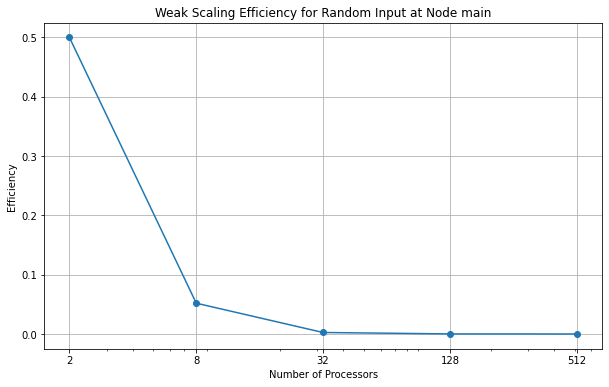

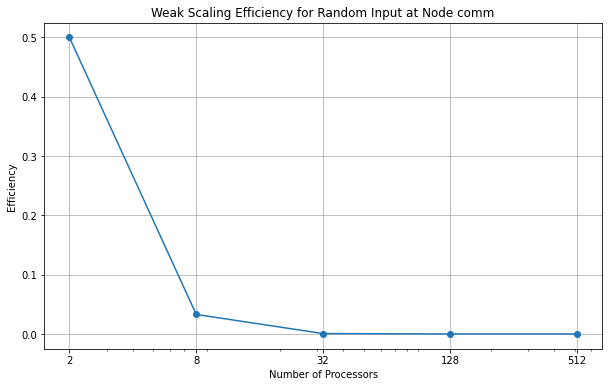

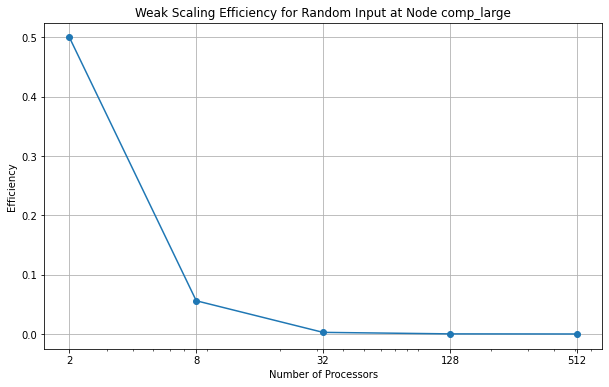

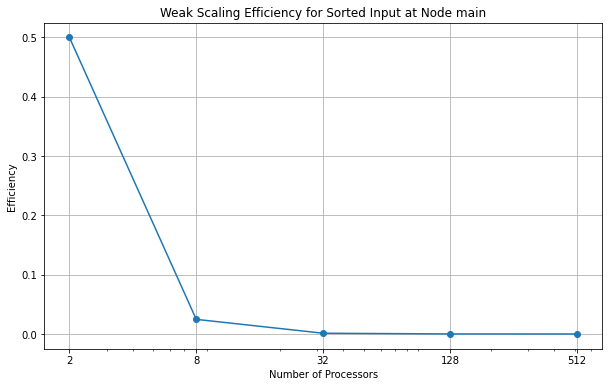

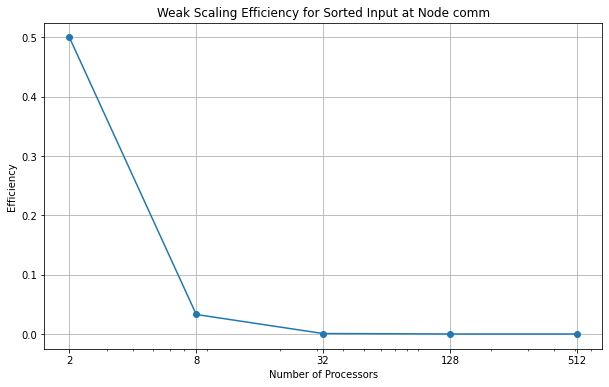

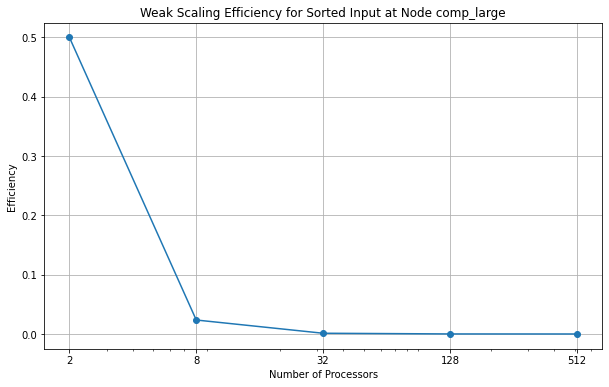

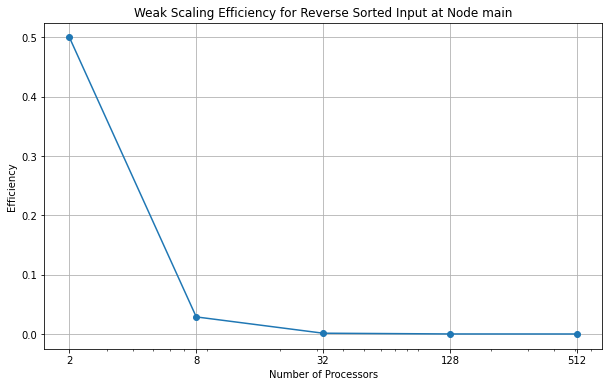

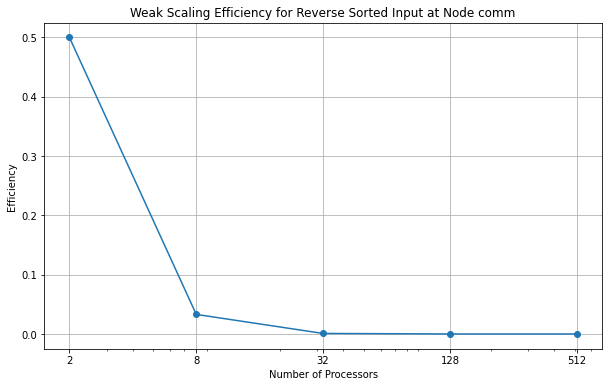

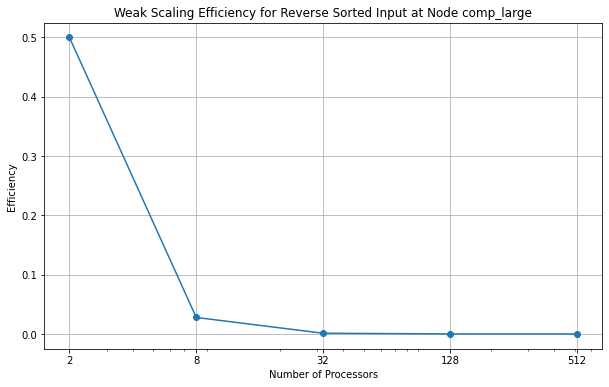

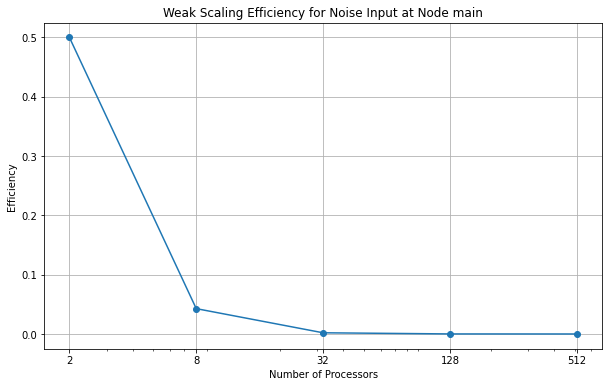

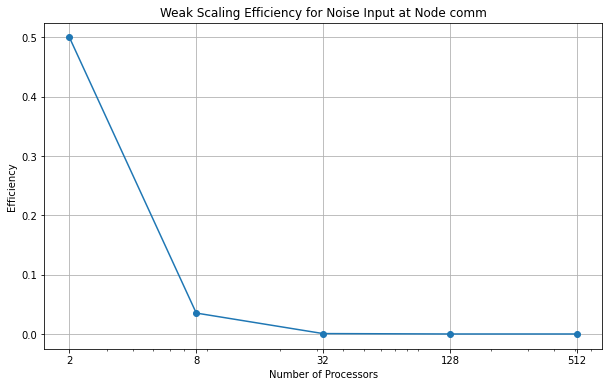

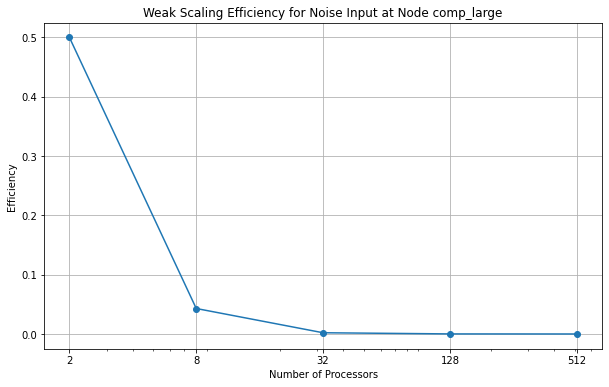

In [8]:
def plot_weak_scaling_efficiency(tk):
    input_type_labels = {0: "Random", 1: "Sorted", 2: "Reverse Sorted", 3: "Noise"}  # Mapping numeric types to labels
    num_procs = [2, 8, 32, 128, 512]  # Processor counts
    input_sizes = [65536, 262144, 1048576, 4194304, 16777216]  # Input sizes corresponding to num_procs

    for input_type in [0, 1, 2, 3]:
        for node in tk.graph.traverse():
            node_name = node.frame['name']
            if node_name in ['comp_large', 'comm', 'main']:
                fig, ax = plt.subplots(figsize=(10, 6))
                efficiencies = []
                proc_list = []
                base_time = None  # Initialize base_time for the smallest configuration

                # Loop over each pair of input size and processor count
                for size, proc in zip(input_sizes, num_procs):
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["input_size"] == size) &
                        (tk.dataframe["num_procs"] == proc) &
                        (tk.dataframe['node'] == node)
                    ]

                    if not data.empty:
                        current_time = data["Avg time/rank"].mean()
                        if proc == 2:  # Use the smallest num_procs for the baseline time
                            base_time = current_time
                        
                        if base_time:
                            efficiency = base_time / (current_time * proc)
                            efficiencies.append(efficiency)
                            proc_list.append(proc)
                    else:
                        print(f"No data available for input_type {input_type_labels[input_type]}, input size {size}, processors {proc}")
                        efficiencies.append(None)
                        proc_list.append(proc)

                # Plotting only if there are valid efficiencies
                valid_efficiencies = [e for e in efficiencies if e is not None]
                valid_procs = [p for p, e in zip(proc_list, efficiencies) if e is not None]
                if valid_efficiencies:
                    ax.plot(valid_procs, valid_efficiencies, marker='o', label=input_type_labels[input_type])

                # Set plot properties
                ax.set_xscale('log')  # Set x-axis to logarithmic scale
                ax.set_xticks(num_procs)  # Ensure specific tick positions for processor counts
                ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Format ticks as integers

                ax.set_title(f'Weak Scaling Efficiency for {input_type_labels[input_type]} Input at Node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Efficiency')
                plt.grid(True)
                plt.show()

# Call the function to plot weak scaling efficiency
plot_weak_scaling_efficiency(tk)